In [1]:
%matplotlib inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prerequisites

- We'll be using a python notebook, if you don't have an environment setup I recommend Conda (https://www.anaconda.com/download/)
- We'll be exploring **gplearn**, a Genetic Programming framework for Python (see https://pypi.org/project/gplearn/ for installation instructions)
- Basic knowledge of ML terms such as Regression vs. Classification (see https://www.geeksforgeeks.org/ml-classification-vs-regression/)

# Symbolic Regressor

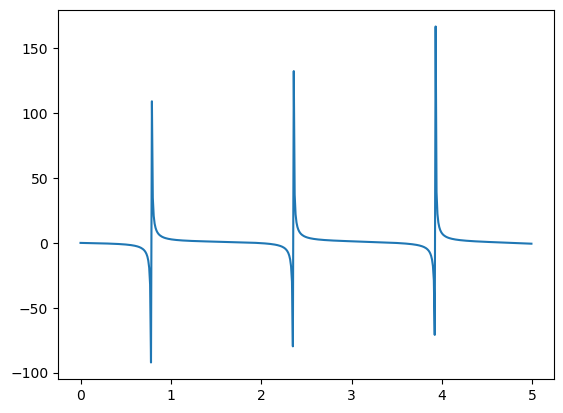

In [2]:
#ground truth
x=np.arange(0,5,0.01)
y = np.sin(np.pi*x/5)-np.tan(x*2)
plt.plot(x,y)

In [3]:
rng = check_random_state(0)


In [4]:
# Training samples
X_train = rng.uniform(0, 20, 100).reshape(-1,1)
y_train = np.sin(np.pi*X_train/5)-np.tan(X_train*2)

# Testing samples
X_test = rng.uniform(0, 20, 100).reshape(-1,1)
y_test = np.sin(np.pi*X_test/5)-np.tan(X_test*2)

In [5]:
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos']

est_gp = SymbolicRegressor(population_size=5000, generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0, function_set=function_set)


In [6]:

est_gp.fit(X_train, y_train.ravel())

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.49          30.7313       12          3.12459          56.8903     24.62s
   1    12.07          10.4401       20          3.08469          56.1023     21.95s
   2    10.76          9.80351        3          2.97945          57.1776     20.28s
   3     9.60          10.5391       17          2.28291          16.7577     19.20s
   4     9.23          9.53942       15           2.3201          19.1291     17.50s
   5    10.24          10.2903       19         0.680804         0.628014     16.79s
   6    16.23          14.9718       19         0.669225         0.732229     16.89s
   7    18.72          23.2361       19         0.666832         0.753761     16.08s
   8    19.94          21.5957       35         0.662298         0.824332  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin',
                                'cos'],
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

## What's This?

The output we get is a formula! And it's presented in a funny way. Check out the docs: https://gplearn.readthedocs.io/en/stable/intro.html#representation

Our result: sub(cos(sqrt(log(X0))), div(sin(add(X0, X0)), cos(add(X0, X0))))



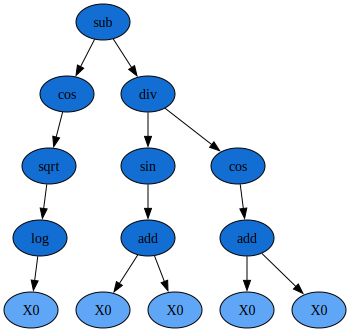

In [22]:
print ("Our result:",est_gp._program)
print('')
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex4_tree', format='png', cleanup=True)
graph

## How did we do?

The blue graph shows the original data, the red our predictions. Not bad!

In [8]:
y_gp = est_gp.predict(x.reshape(-1,1))
score_gp = est_gp.score(X_test, y_test)

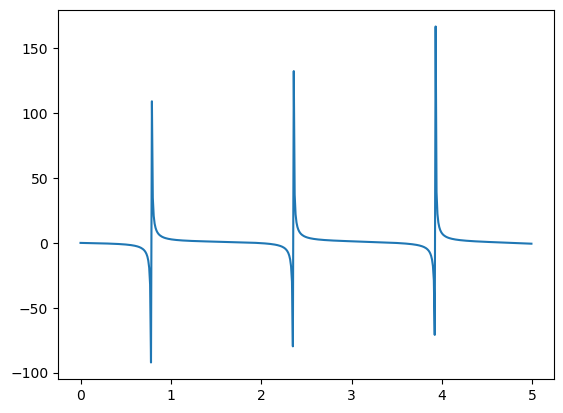

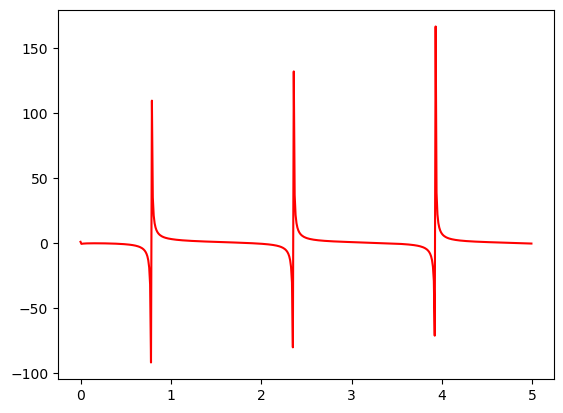

In [9]:
#ground truth
plt.plot(x,y)
plt.show()
#predictions
plt.plot(x,y_gp, color='red')
plt.show()

# Symbolic Classifier

In [10]:
from sklearn.datasets import make_moons, make_circles, make_classification
from gplearn.genetic import SymbolicClassifier
from matplotlib.colors import ListedColormap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Generate linear dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

# Create a DataFrame
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Target'] = y


In [12]:
rng = np.random.RandomState(2)
#This code is used to add random noise to the array X. Each element of X gets incremented by a 
#random value uniformly distributed between 0 and 2
X += 2 * rng.uniform(size=X.shape) #

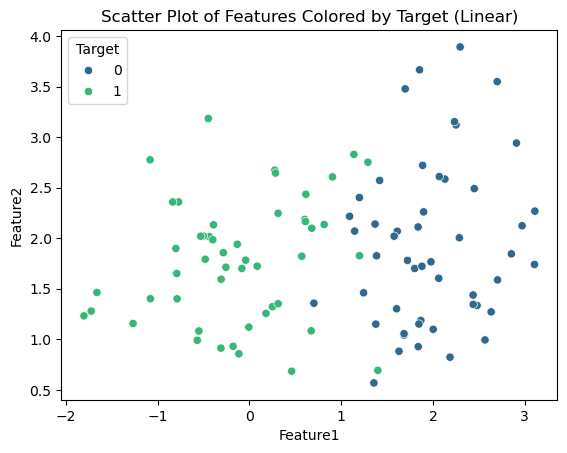

In [13]:
# Create a scatter plot
sns.scatterplot(data=data, x='Feature1', y='Feature2', hue='Target', palette='viridis')

# Adding titles and labels for clarity
plt.title('Scatter Plot of Features Colored by Target (Linear)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Show the plot
plt.show()

In [14]:
linearly_separable = (X, y)

#Create our datasets and put into a list
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

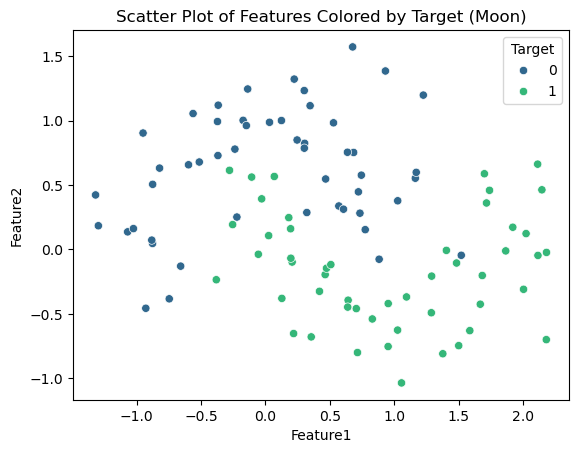

In [15]:
# lets look at our moon!

# Create a DataFrame
data_circle = pd.DataFrame(datasets[0][0], columns=['Feature1', 'Feature2'])
data_circle ['Target'] = datasets[0][1]

# Create a scatter plot
sns.scatterplot(data=data_circle, x='Feature1', y='Feature2', hue='Target', palette='viridis')

# Adding titles and labels for clarity
plt.title('Scatter Plot of Features Colored by Target (Moon)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Show the plot
plt.show()


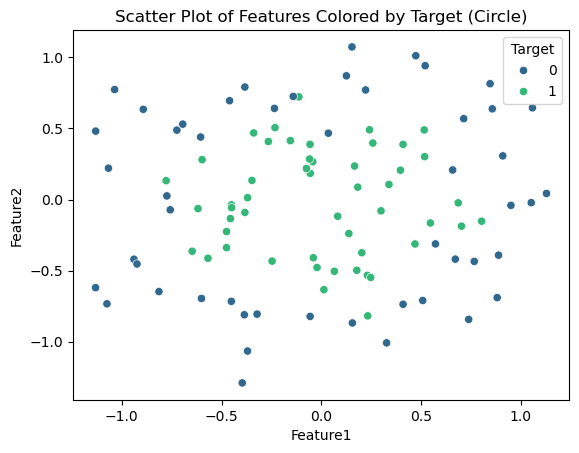

In [16]:
# lets look at our circle!

# Create a DataFrame
data_moon = pd.DataFrame(datasets[1][0], columns=['Feature1', 'Feature2'])
data_moon ['Target'] = datasets[1][1]

# Create a scatter plot
sns.scatterplot(data=data_moon, x='Feature1', y='Feature2', hue='Target', palette='viridis')

# Adding titles and labels for clarity
plt.title('Scatter Plot of Features Colored by Target (Circle)')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Show the plot
plt.show()

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.53          3.33185       15         0.391835              N/A      6.77s
   1    12.07         0.865922        5          0.38158              N/A      4.11s
   2     7.84         0.632685       13         0.359984              N/A      3.82s
   3     7.79         0.547189       17         0.352996              N/A      3.42s
   4     6.91         0.501952       17         0.352996              N/A      3.23s
   5    11.05         0.528473       25         0.329847              N/A      3.06s
   6    15.47         0.517238       25         0.329847              N/A      2.90s
   7    16.65         0.567082       21         0.321571              N/A      2.68s
   8    22.07         0.718537       25         0.295352              N/A  

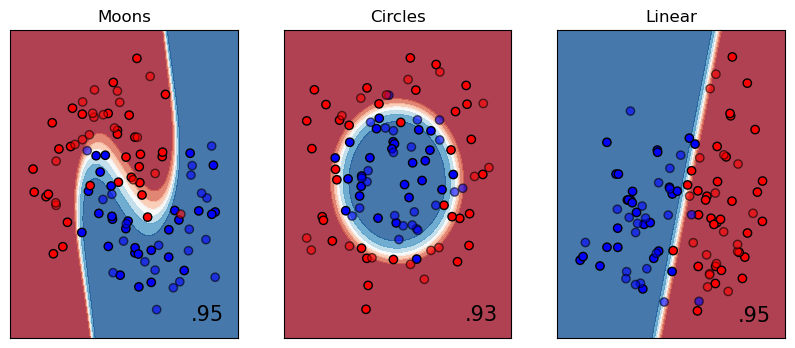

In [18]:
h = .02  # step size in the mesh
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
names = ['Moons','Circles','Linear']
plt.figure(figsize=(10, 4))  # Change 10 to your desired width


# iterate over datasets

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h)) #What's this? See above for visualization.
    
    ax = plt.subplot(1,len(datasets), ds_cnt+1)

    ###########CLASSIFIER CODE#######################
    
    clf = SymbolicClassifier(random_state=0, verbose=1) #CLASSIFIER
    clf.fit(X_train, y_train) #CLASSIFYING
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    #################BACK TO PLOTTING################

    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax.set_title(names[ds_cnt])
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')


# Appendix

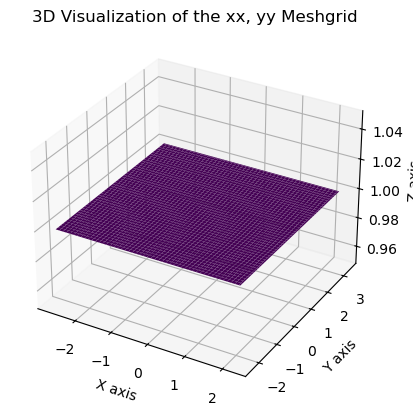

In [19]:
# What's up with the xx and yy?
zz = xx**0

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(xx, yy, zz, cmap='viridis')

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Visualization of the xx, yy Meshgrid')

# Show the plot
plt.show()
